<a href="https://colab.research.google.com/github/niralishah01/122_NiraliShah/blob/main/Lab5_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples)
# only for apples
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [60]:
#normalize the input
mu = np.mean(inputs, 0)
sigma = np.std(inputs, 0)
X = (inputs-mu) / sigma
X = np.hstack((np.ones((targets.size,1)),X))
print(X)
print(X.shape)

[[ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]
 [ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]
 [ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]]
(15, 4)


In [61]:
rg = np.random.default_rng(seed=122)
w = rg.random((1,4))
print(w)

[[0.82535258 0.175624   0.37758445 0.20931232]]


In [62]:
#create model
def model(X,w):
  return (X @ w.T)


In [63]:
# Generate predictions
preds = model(X,w)
print(preds)

[[0.23732668]
 [1.11204431]
 [1.52488796]
 [0.26096272]
 [0.99154107]
 [0.23732668]
 [1.11204431]
 [1.52488796]
 [0.26096272]
 [0.99154107]
 [0.23732668]
 [1.11204431]
 [1.52488796]
 [0.26096272]
 [0.99154107]]


In [64]:
# Compare with targets
print(targets)

[[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [65]:
# MSE loss
def mse(pred,targ):
  diff=pred-targ
  return np.sum(diff*diff)/diff.size

In [66]:
# Compute loss
mse_loss=mse(preds,targets)
print("before regression cost is: ",mse_loss)

before regression cost is:  6834.054916830895


In [51]:
# Gradients for weights
def gradient_descent_weight(X, y, w, learning_rate):
  history = np.zeros([1])
  h = X@w.T
  diff = h - y
  delta = (learning_rate / y.size) * (X.T@diff)
  new_w = w - delta.T
  w = new_w
  history = mse(h, y)
  return (history, w)

In [67]:
learning_rate=0.01
(history,w)=gradient_descent_weight(X, targets, w, learning_rate)
# (history,b)=gradient_descent_bias(X,targets,b,learning_rate)
# Generate predictions
preds = model(X,w)
print(preds)
# Compare with targets
print(targets)

[[ 0.68817076]
 [ 2.01884885]
 [ 2.84615136]
 [-0.07785907]
 [ 2.42018321]
 [ 0.68817076]
 [ 2.01884885]
 [ 2.84615136]
 [-0.07785907]
 [ 2.42018321]
 [ 0.68817076]
 [ 2.01884885]
 [ 2.84615136]
 [-0.07785907]
 [ 2.42018321]]
[[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [68]:
n_iters=200
history = np.zeros((n_iters, 1))
for i in range(n_iters):
  (history[i], w) = gradient_descent_weight(X, targets, w, learning_rate)
print("optimal parameters: ",w)
print("final cost: ",history[-1])

optimal parameters:  [[66.20231602 -5.16587675 20.57469822 12.55654418]]
final cost:  [117.5942513]


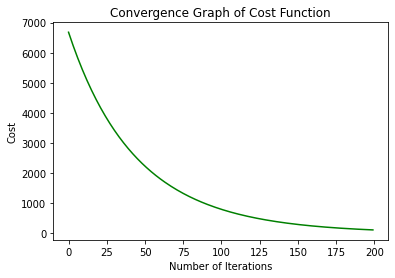

In [70]:
import matplotlib.pyplot as plt

plt.plot(range(len(history)), history, 'g')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [72]:
# Calculate error
preds = model(X, w)
cost_final = mse(preds, targets)
# Print predictions
print("Prediction:\n",preds)
# Comparing predicted with targets
print("Targets:\n", targets)

Prediction:
 [[ 47.04023446]
 [ 74.64387082]
 [101.47485137]
 [ 12.34114115]
 [ 95.51148212]
 [ 47.04023446]
 [ 74.64387082]
 [101.47485137]
 [ 12.34114115]
 [ 95.51148212]
 [ 47.04023446]
 [ 74.64387082]
 [101.47485137]
 [ 12.34114115]
 [ 95.51148212]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [74]:
print("cost before regression: ",mse_loss)
print("cost after regression: ",cost_final)
print("Cost reduction : ",(((mse_loss- cost_final) / mse_loss) * 100),"%")

cost before regression:  6834.054916830895
cost after regression:  115.43601311790844
Cost reduction :  98.31087085891551 %
